<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Scene%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

# Install Monk

# Using pretrained model for classifying elements

# Training a classifier using monk's default mode

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
import tarfile
import urllib

# Dataset Download
- Credits: http://places2.csail.mit.edu/download.html
- You can also download test images.
- After downloading training dataset make one train folder and put all the images in train folder and make csv for label.

In [ ]:
url = 'http://data.csail.mit.edu/places/places365/train_256_places365standard.tar'
file_tmp = urllib.request.urlretrieve(url, filename=None)[0]

In [ ]:
base_name = os.path.basename(url)
file_name, file_extension = os.path.splitext(base_name)
tar = tarfile.open(file_tmp)
tar.extractall(file_name)

# Install Monk
## Using pip (Recommended)
- colab (gpu)
  - All bakcends: pip install -U monk-colab
- kaggle (gpu)
  - All backends: pip install -U monk-kaggle
- cuda 10.2
  - All backends: pip install -U monk-cuda102
  - Gluon bakcned: pip install -U monk-gluon-cuda102
  - Pytorch backend: pip install -U monk-pytorch-cuda102
  - Keras backend: pip install -U monk-keras-cuda102
- cuda 10.1
  - All backend: pip install -U monk-cuda101
  - Gluon bakcned: pip install -U monk-gluon-cuda101
  - Pytorch backend: pip install -U monk-pytorch-cuda101
  - Keras backend: pip install -U monk-keras-cuda101
- cuda 10.0
  - All backend: pip install -U monk-cuda100
  - Gluon bakcned: pip install -U monk-gluon-cuda100
  - Pytorch backend: pip install -U monk-pytorch-cuda100
  - Keras backend: pip install -U monk-keras-cuda100
- cuda 9.2
  - All backend: pip install -U monk-cuda92
  - Gluon bakcned: pip install -U monk-gluon-cuda92
  - Pytorch backend: pip install -U monk-pytorch-cuda92
  - Keras backend: pip install -U monk-keras-cuda92
- cuda 9.0
  - All backend: pip install -U monk-cuda90
  - Gluon bakcned: pip install -U monk-gluon-cuda90
  - Pytorch backend: pip install -U monk-pytorch-cuda90
  - Keras backend: pip install -U monk-keras-cuda90
- cpu
  - All backend: pip install -U monk-cpu
  - Gluon bakcned: pip install -U monk-gluon-cpu
  - Pytorch backend: pip install -U monk-pytorch-cpu
  - Keras backend: pip install -U monk-keras-cpu

# Install Monk Manually (Not recommended)
## Step 1: Clone the library
- git clone https://github.com/Tessellate-Imaging/monk_v1.git

## Step 2: Install requirements
- Linux
  - Cuda 9.0
    - cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt
  - Cuda 9.2
    - cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt
  - Cuda 10.0
    - cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt
  - Cuda 10.1
    - cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt
  - Cuda 10.2
    - cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt
  - CPU (Non gpu system)
    - cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt
- Windows
  - Cuda 9.0 (Experimental support)
    - cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt
  - Cuda 9.2 (Experimental support)
    - cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt
  - Cuda 10.0 (Experimental support)
    - cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt
  - Cuda 10.1 (Experimental support)
    - cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt
  - Cuda 10.2 (Experimental support)
    - cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt
  - CPU (Non gpu system)
    - cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt
- Mac
  - CPU (Non gpu system)
    - cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt
- Misc
  - Colab (GPU)
    - cd monk_v1/installation/Misc && pip install -r requirements_colab.txt
  - Kaggle (GPU)
    - cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt
    
# Step 3: Add to system path (Required for every terminal or kernel run)
  - import sys
  - sys.path.append("monk_v1/");
  
# Using pretrained model for classifying elements

In [15]:
import sys
sys.path.append("monk_v1/");

In [16]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

In [ ]:
# Download trained weights

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kt6OIGM2wontsML694bc9wHML1mMX9pI' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kt6OIGM2wontsML694bc9wHML1mMX9pI" -O cls_places365_trained.zip && rm -rf /tmp/cookies.txt

In [7]:
! unzip -qq cls_places365_trained.zip

In [17]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("New_Project", "Using-vgg16_epoch20", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/New_Project/Using-vgg16_epoch20/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: New_Project
    Experiment: Using-vgg16_epoch20
    Dir: /home/ubuntu/workspace/New_Project/Using-vgg16_epoch20/



In [ ]:
# Infer

Prediction
    Image name:         test_256/Places365_test_00231227.jpg
    Predicted class:      ice_skating_rink_indoor
    Predicted score:      16.899547576904297



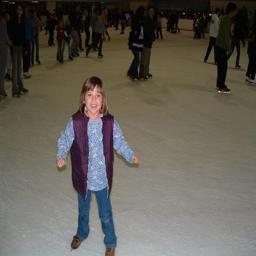

In [25]:
img_name = "test_256/Places365_test_00231227.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         test_256/Places365_test_00218427.jpg
    Predicted class:      dressing_room
    Predicted score:      19.40629768371582



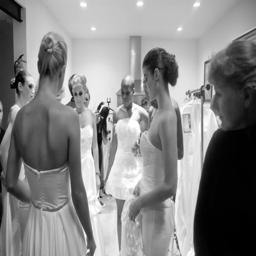

In [28]:
img_name = "test_256/Places365_test_00218427.jpg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

# Training a classifier using monk's default mode

In [ ]:
# Using mxnet-gluon backend 
from monk.gluon_prototype import prototype

# For pytorch backend
#from monk.pytorch_prototype import prototype

# For Keras backend
#from monk.keras_prototype import prototype

In [ ]:
from gluon_prototype import prototype
gtf = prototype(verbose=1);
gtf.Prototype("Places_365", "Experiment");

In [ ]:
gtf.Default(dataset_path="train/",
            path_to_csv="labels.csv", 
            model_name="vgg16",
            freeze_base_network=False,
            num_epochs=20);

In [ ]:
gtf.Train();

In [ ]:
# To check model on test images
gtf = prototype(verbose=1);
gtf.Prototype("Places_365", "Experiment", eval_infer=True);

In [ ]:
img_name = "test_256/Places365_test_00151496.jpg" 
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

In [ ]:
img_name = "test_256/Places365_test_00208427.jpg" 
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)